# Lab Assignment 2
Name: **Rafiqul Islam** ; 
student id : **12123971**

### Task -1 Dimensionality Reduction, Principal Component Analysis
## a)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
#read raw data form csv file
df = pd.read_csv (r'H:\University Of Vienna\Sem_1\FDA\Unsupervised\Assignments\A2\Lab assignment 2/seeds.csv')
x = df.copy()
y = df.columns.values.tolist()
x.head()
# y

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
scaler = StandardScaler()
# scaler.fit(df)
# scale data using standard scaler to use in PCA
scaled_data = scaler.fit_transform(x)
scaled_data
# scaled_data.shape

array([[ 0.11716431,  0.18679667,  0.0081443 , ..., -1.00737062,
        -0.40826475, -1.22634124],
       [-0.01330197, -0.01975993,  0.44234139, ..., -1.82718718,
        -0.9454197 , -1.22634124],
       [-0.21586804, -0.38697165,  1.46979786, ..., -0.68162472,
        -1.21196249, -1.22634124],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ...,  3.14554887,
        -0.74195192,  1.23872853],
       [-1.05703224, -1.06019315, -0.80436312, ..., -0.06897709,
        -0.76636805,  1.23872853],
       [-0.89909937, -0.96073998, -0.10362921, ...,  1.32055406,
        -0.72770917,  1.23872853]])

In [10]:
pca_data = PCA(n_components=3)
x_pca = pca_data.fit_transform(scaled_data)
# x_pca
# x_pca.shape
df_xpca = pd.DataFrame(data = x_pca, columns=['PC1', 'PC2', 'PC3'])
df_xpca.head()

,PC1,PC2,PC3
0,0.519516,1.368060,-0.628734
1,0.244365,2.313525,-0.641916
2,-0.200035,2.330453,0.984240
3,-0.330086,2.378698,0.543494
4,1.335879,2.262522,0.101649


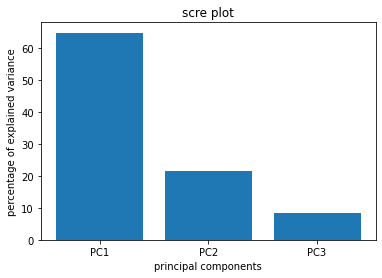

In [12]:
per_var = np.round(pca_data.explained_variance_ratio_ * 100, decimals=1)
# pca_data.explained_variance_ratio_
label = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scre plot')
plt.show()

In [16]:
#SVD part------------------------------
from numpy.linalg import svd 
# df.shape[0]
B1 = df.copy() 
B1 -= np.mean(df, axis=0) 
B1.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.341256,0.244171,0.000189,0.119849,0.046467,-1.478217,-0.200653,-0.994975
1,-0.038744,-0.025829,0.010289,-0.089151,0.067467,-2.681217,-0.464653,-0.994975
2,-0.628744,-0.505829,0.034189,-0.352151,0.071467,-1.000217,-0.595653,-0.994975
3,-1.078744,-0.655829,0.024689,-0.319151,0.113467,-1.440217,-0.615653,-0.994975
4,1.221256,0.394171,0.032589,0.014849,0.296467,-2.344217,-0.245653,-0.994975


In [31]:
U, S, Vt = svd(df, full_matrices=False,
                compute_uv=True)
# Data matrix X, X doesn't need to be 0-centered
n, m = df.shape
    
print("U:")
print(U)
print("S used for building Sigma:")
print(S)

# Sigma = np.zeros((n, n), dtype=float)
# Sigma[:8, :8] = np.diag(S)
print("Sigma:")
print(S)
print("V already transposed:")
print(Vt)
# print("CHECK FOR SVD:")
# print("U * Sigma * Vt (=B1)")
# print(np.dot(U, np.dot(Sigma, Vt)))

# Transform X with SVD components
X_svd = np.dot(U, np.diag(S))
# X_svd

NameError: name 'svd' is not defined

## b)

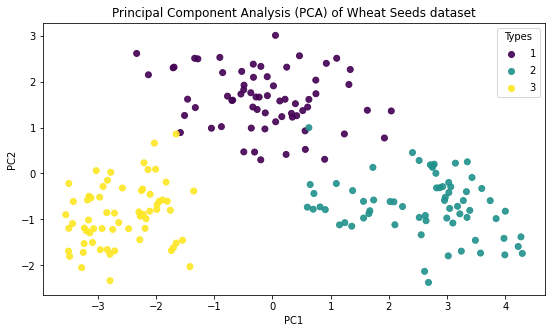

In [80]:
types = df.Type
plt.figure(figsize = (9,5))
points = plt.scatter(x_pca[:,0], x_pca[:,1], c = types,  alpha=0.9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis (PCA) of Wheat Seeds dataset")
plt.legend(*points.legend_elements(), title="Types")
plt.show()


## c)

### The importance of PCA in the “curse of dimensionality” problem:
'curse of dimensionality' is a major problem in data mining in large data sets with many potential predictor variables. This expression describe the increasing difficulty in training a model when more predictor variables are added to it. In other words, the error increases with the increase in the number of features. Furthermore, because of high dimentation the algorithms are harder to design.

Principal component analysis (PCA) can solve this problem. PCA is a technique for reducing the large dimensionality of datasets to a smaller one that still contain the most important information from the large set. So without lossing much information we get the lower dimensional data, lower dimensional data is make the computarions easy and faster.

### Task -2 Clustering
## a)

### Task -3 Apriori Algorithm for Recommender Systems
## a)

In [82]:
import numpy as np
import pandas as pd

In [89]:
movie_df = pd.read_fwf(r'H:\University Of Vienna\Sem_1\FDA\Unsupervised\Assignments\A2\Lab assignment 2/movies.txt')
movie_df.head()

,Incredibles 2;Avengers: Infinity War - Part I;Avengers: Infinity War - Part II;Deadpool 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Annihilation;John Wick: Chapter 3 – Parabellum...,NaN,NaN,NaN,NaN,NaN
1,Avengers: Infinity War - Part I;Bohemian Rhapsody,NaN,NaN,NaN,NaN,NaN
2,Green Book;Incredibles 2;Isle of Dogs,NaN,NaN,NaN,NaN,NaN
3,Bohemian Rhapsody;Captain Marvel;Avengers: Inf...,NaN,NaN,NaN,NaN,NaN
4,Deadpool 2;Incredibles 2;Avengers: Infinity Wa...,NaN,NaN,NaN,NaN,NaN
